# 强化学习笔记：目标、奖励、回报和回合

# 1. 前言

在上一篇我们介绍了强化学习问题的形式化(数学)框架：马尔科夫决策过程。本篇以及后续几篇继续讨论这个形式化(数学)框架下的关键要素和概念，如奖励和回报、策略、值函数、贝尔曼方程等等。

注意，本文中有时候说time-step t，有时候说时刻t，表示相同的意思。


# 2. 目标(Goals)和奖励(Rewards)

在强化学习中，智能体（学习者）的目标（purpose or goal）的形式化体现为奖励信号。在每一步，奖励信号是一个实数值信号$R_t\in\mathbb{R}$。而智能体的学习目标就是奖励的最大化，但是这个最大化的目标不一定是（或者甚至可以说通常都不是）即时奖励（即每一步行动后环境反馈给智能体的奖励），而是从长期角度来看的累计的总体奖励。用总体奖励来作为学习目标的形式化描述是强化学习的区别于其它人工智能学习类型的一个最独特的特征。

如何给智能体反馈即时奖励（或可以称为即时奖励策略，请注意区别于智能体所要学习的选择行动的策略，以下我们提到策略都是指后者，提及前者时会用全称）是我们向智能体传达我们希望达成的真正目标的手段，这个将决定智能体学习到什么样的策略。正确的即时奖励策略应该是能够使得智能体基于即时奖励并使得总体奖励最大化就自然实现了我们所期望的目标。如果即时奖励不妥当的话，智能体可能就无法达成我们希望它达成的真正目标。

即时奖励策略并没有告诉智能体应该如何去使得奖励最大化，也并没有向智能体传达任何关于游戏的先验知识（先验知识可以在策略初始化或价值函数初始化中体现）

以围棋为例，我们希望智能体达成的真正目标是赢下一局棋，而不是像吃子，或者围住了某个局部区域。因此我们应该在最终取胜时给与决定性的奖励，而游戏过程中的行棋或甚至局部获利都不应该给很大奖励（相比最终赢棋的奖励而言）或者甚至不给奖励，以免误导智能体。如果我们给行棋过程中的局部获利过大的奖励的话，则可能导致智能体为了局部获利甚至付出让出最后的胜利的代价！



# 3 回报(return)与回合(episode)

上一节我们说明了智能体学习的目标是总体奖励。但是如何对总体奖励给出严格的形式化的定义呢？更具体一点说，当每一步的即时奖励记为$R_t$，直观地来说，这个总体奖励肯定应该是通过这个即时奖励序列来计算的。但是如何定义这个总体奖励才能形成正确的即时奖励策略，使得智能体基于即时奖励评估得的总体奖励的最大化自然地导致了我们所期望的目标的实现？

通常来说，我们把总体奖励最大化问题转化为一个更简单的问题（两者是否等价或近似等价有待证明），时间步t的预期回报（记为$G_t$）的最大化。考虑时间步t(采用行动$A_t$)之后的奖励序列为$R_{t+1}, R_{t+2}, R_{t+3}, ..., R_T$，其中T表示最终时间步。则$G_t$的最简单直观的定义就是去它们的和，如下所示：

$$G_t = R_{t+1}+ R_{t+2}+ R_{t+3}+...+R_T = \sum\limits_{k=t+1}\limits^{T}R_k\qquad\cdots(1)$$

以上表达式假定智能体与环境的交互存在一个最终时间步，其对应的状态称之为最终状态。以一个最终状态为结束标志的智能体与环境的交互序列我们称之为一个回合(episode).比如说，一场比赛、一局棋、一次迷宫挑战等等。每个回合结束后会得到不同的结果，对应着不同的回报。这种具有回合特征的任务我们称之为回合制任务(episodic tasks)。在回合制任务中，我们通常将除最终状态以外的状态记为$\mathscr{S}$，而将包含最终状态在内的所有状态的集合记为$\mathscr{S^+}$。每个回合之间是相互独立的。每个回合的结束的时间步T也是不同的，是一个随机变量。比如说，一局围棋，有时候是只有一百来手快速屠龙胜负，有些则可能是三百手棋以上的官子半目胜负。

在有些情况下，一个任务没有明确的最终状态，而是无限地延申下去。比如说一个机器人在其生命期内的学习过程，或者我们自己终其一生的学习和成长过程（从我们自己的视角来看。当然这个是相对的，如果存在生命轮回而且有一个上帝视角来观察那这个，那个体的一次人生也就变成一个回合了^-^）。这种任务我们称之为连续性任务（continuing tasks）。对于连续性任务来说，上式应该修正如下：

$$G_t = R_{t+1}+ R_{t+2}+ R_{t+3}+... = \sum\limits_{k=t+1}\limits^{\infty}R_k\qquad\cdots(2)$$

但是，仅仅这样的修正会导致另一个问题。比如说如果每一步的奖励都是大于等于0的，那无限时间步以后$G_t$可能会趋向于无穷大，这个对于数学处理来说会是一个麻烦（要记住，形式化的目的就是要方便与数学处理！）。因此，通常我们再引入一个被称为折扣系数$\gamma$(discounting factor)的参数，将上式进一步修正如下：

$$G_t = R_{t+1}+ \gamma R_{t+2}+ \gamma^2 R_{t+3}+... = \sum\limits_{k=0}\limits^{\infty}\gamma^{k} R_{k+t+1},\quad 0<\gamma<1,\qquad\cdots(3)$$

折扣因子的作用是将未来的奖励折现到当前时刻来计算，距离当前越远的奖励其折扣越大，即折现到当前时刻的值就越小。如果折扣因子小于1的话，如果即时奖励Rt是有界的，则式(3)就确保能够收敛。如果$\gamma=1$式(3)退化为式(2)，如果$\gamma=0$式(3)退化为只考虑即时奖励作为最大化对象的总体奖励，类似于贪婪策略。如果智能体的行动仅对即时奖励有影响，则$\gamma=0$所代表的贪婪策略恰好就是我们所需要的。通常来说\gamma越小表示智能体越“近视”，反之\gamma越大表示智能体越具有“远见卓识”。

通过简单的数学处理我们可以基于式(3)得到Gt的递推关系式，这个对于算法设计和理论分析非常重要：

$$G_t = \sum\limits_{k=0}\limits^{\infty}\gamma^{k} R_{k+t+1} = R_{t+1}+ \gamma\sum\limits_{k=0}\limits^{\infty}\gamma^{k} R_{k+t+2} = R_{t+1}+ \gamma G_{t+1} \qquad\cdots(4)$$

而且，虽然式(4)式基于连续性任务的Gt表达式推导而得的，但是对于回合制任务，对于t<T式(4)都是成立的，只要我们定义$G_T=0$。

考虑一个简单的情况，如果$\gamma < 1$，而每一步的回到为固定的+1，则可以得到$$G_t=\sum\limits_{k=0}\limits^{\infty}\gamma^{k}=\frac{1}{1-\gamma}\quad\cdots(5)$$

# 4. 连续性任务与回合制任务的相对性

关于一个任务是连续性的还是回合制的并不是绝对的，取决于看问题的视点。而且这不同的视点，如果采取不同的即时奖励策略，可以导向相同的目标。以下以pole-balancing问题为例(sutton-book-Example3.4)进行说明。

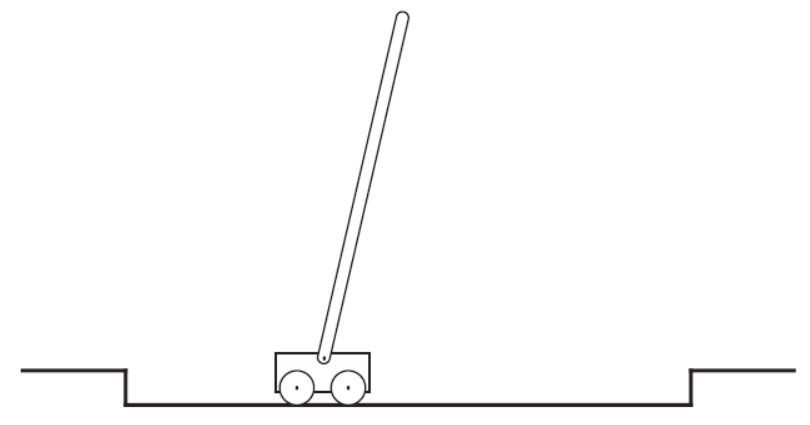

在这个游戏中，智能体的任务是对小车施加一个力使得通过可无摩擦自由转动的铰链连接于其上的木棒尽量长时间的保持不倒下。如果木棒（相对于垂直方向）倾斜的角度大于某个门限，或者小车脱离了轨道则认为是失败。游戏开始时木棒初始状态是垂直的。

如果我们把失败状态当作最终状态，考虑每个时间步没有出现失败则得到奖励+1。这个游戏可以看作是一个回合制的任务，每个回合就是从初始垂直状态开始到一次失败为止，每个回合的回报就是从开始到最终失败所能坚持的time-step数（考虑$\gamma=1$）。如果一直保持平衡直到永远则所得到的回报就是无穷大。

我们也可以不把失败状态当作最终状态，而把这个游戏看作是一个永远持续下去的游戏，只不过中间偶尔会失败然后再重启。考虑每次失败的奖励为-1，其它时刻则为0，并考虑$\gamma<1$。这样，在每个时刻t的预期回报可以表示为：

$$G_t = \sum\limits_{j}-\gamma^{K_j - 1} \qquad\cdots(6)$$

$K_j$表示时刻t之后的第j次失败距离当前时刻的时间步数。

不管采取以上哪种视点，回报的最大化都导向同一个目标，即尽量维持不出现失败状态的时间越长越好。


# 5. Unified Notation for Episodic and Continuing Tasks

前面我们介绍了回合制(episodic)任务和连续性(continuing)任务两种强化学习任务。在回合制任务中，智能体与环境的交互自然地分割为一系列的回合，每个回合包括若干个时间步的交互，每个回合以一个明确的结束状态作为标志。而连续性任务则没有一个明确的结束状态（或者可以看作是一个无限的回合？）。注意，即便是回合制任务，智能体与环境的交互也是无限持续的，只不过中间时不时会进入结束状态并重启开始。但是学习是一直持续的，并且虽然状态会重置但是学习结果不会重置，即每个回合的学习都是在上一个回合的学习结果的基础上继续的。比如说AlphaZero的围棋训练是一直持续进行的（直到这个项目被人类放弃。。。所以说无限持续是指在AlphaZero生命周期内这个意义上），但是它的训练很自然地是以一局棋一局棋的方式进行，不会有一局棋一直持续直到永远的（围棋中某种情况，比如说出现多劫循环，强制中止并判为和局之类的规则）。


回合制任务中由于一个行动只影响到后续有限时间步的奖励，因此从数学处理的角度来说比较容易。有时候我们需要讨论回合制任务，有时候需要讨论连续性任务，有时候则两者兼而讨论之，因此有必要统一符号标记系统可以使得讨论（特别同时讨论两种任务）变得更为方便。

在回合制任务中，为了体现出不同的回合之间的区别，我们将不再只适用时间步t作为序号下标，而改为使用元组(t,i)作为序号下标。其中t表示在一个回合内的时间步，每个回合开始时t都复位为0；i表示回合序号。因此$S_{2,2}$表示回合#2的第3个时间步的状态。其它$A_{t,i}, R_{t,i}, \pi_{t,i}, T_i$等同理。

当然，在绝大多是情况下，当我们讨论回合制时是不需要区分不同的回合的。一般来说，我们要么讨论特定的回合，要么讨论对于所有的回合所通用的东西。因此，在实践中，我们通常为了简化，会忽略掉对回合序号的显式引用，比如说用$S_t$指代$S_{t,i}$。

我们需要约定另外一种单一标记法来覆盖回合制和连续性任务。在前面式(1)我们把回报定义成有限项之和，在式(3)中则定义了无限项之和的回报。通过将回合制任务中的结束状态定义为一种奖励恒为0的吸收状态（类似于黑洞，只能进不能出），我们可以将式(1)和式(3)的两种表达式统一。比如说，考虑以下这种状态转移图：
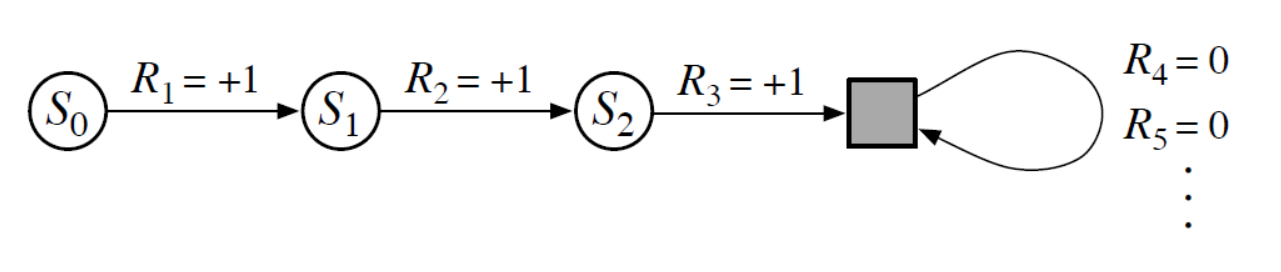

图中的黑框表示吸收状态，对应于回合制任务的结束状态。根据图中的状态转移序列，我们得到的奖励序列为1,1,1,0,0,0,...，因此不管我们是只用前三项计算还是用无限项进行计算都将得到同样的总体回报。

由此我们可以基于式(3)将回报定义改写为：

$$G_t = R_{t+1}+ \gamma R_{t+2}+ \gamma^2 R_{t+3}+... = \sum\limits_{k=t+1}\limits^{T}\gamma^{k-t-1} R_{k}\qquad\cdots(7)$$

这里，允许$T=\infty \ or\ \gamma=1$，只要两者不同时出现。

式(7)既可以覆盖连续性任务的回报定义($T=\infty \ and\ 0\leq \gamma < 1$)，也可以覆盖回合制任务(忽略回合序号，且$T<\infty \ and\ \gamma \in [0,1]$))，后续我们将采用这种回报定义。


# 3. 小结

欲知后事如何且听下回分解^-^

## Policies and Value Functions
## Optimal Policies and Optimal Value Functions
## Optimality and Approximation
## Summary

参考文献：

[1] Sutton-RLbook-chapter3
